Keras 서브 클래싱 API
앞으로 자주사용하게 될 것 같다 pytorch를 하다보면 class를 nn.Module을 통해서 상속 받고 함수를 만들었었다.
이와 같이 서브클래스를 만들어서 조작하는 것을 나타낸다.


In [1]:
import tensorflow as tf
import numpy as np
class Linear_model(tf.keras.Model):
    def __init__(self):
        super(Linear_model,self).__init__()
        self.linear = tf.keras.layers.Dense(1,input_dim=1,activation='linear')
    def call(self,x):
        #x = self.input_layer(x)
        y_pred = self.linear(x)
        return y_pred


model = Linear_model()
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=np.float32)  # Convert to NumPy array
y = np.array([11, 22, 33, 44, 53, 66, 77, 87, 95], dtype=np.float32)  # Convert to NumPy array
X = X.reshape(-1, 1)

sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
model.fit(X, y, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 330ms/step - loss: 4380.4507 - mse: 4380.4507
Epoch 2/300
1/1 [==============================] - 0s 4ms/step - loss: 540.1000 - mse: 540.1000
Epoch 3/300
1/1 [==============================] - 0s 5ms/step - loss: 67.5726 - mse: 67.5726
Epoch 4/300
1/1 [==============================] - 0s 5ms/step - loss: 9.4300 - mse: 9.4300
Epoch 5/300
1/1 [==============================] - 0s 4ms/step - loss: 2.2745 - mse: 2.2745
Epoch 6/300
1/1 [==============================] - 0s 5ms/step - loss: 1.3926 - mse: 1.3926
Epoch 7/300
1/1 [==============================] - 0s 6ms/step - loss: 1.2825 - mse: 1.2825
Epoch 8/300
1/1 [==============================] - 0s 4ms/step - loss: 1.2675 - mse: 1.2675
Epoch 9/300
1/1 [==============================] - 0s 4ms/step - loss: 1.2642 - mse: 1.2642
Epoch 10/300
1/1 [==============================] - 0s 5ms/step - loss: 1.2623 - mse: 1.2623
Epoch 11/300
1/1 [==============================] - 0s 4ms/step -

In [2]:
text_x = np.array([5])
text_x = text_x.reshape(-1,1)
model.predict(text_x)

1/1 [==============================] - 0s 59ms/step


array([[54.283012]], dtype=float32)

다층 퍼셉트론을 구성해서 텍스트를 분류해보자

In [3]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
texts = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
print(tokenizer.word_index)

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


In [7]:
#keras의 texts_to_matrix를 사용해보자
print(tokenizer.texts_to_matrix(texts,mode='count'))
print('binary',tokenizer.texts_to_matrix(texts,mode='binary'))
print('freq',tokenizer.texts_to_matrix(texts,mode='freq'))
print('tfidf',tokenizer.texts_to_matrix(texts,mode='tfidf'))

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]
binary [[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]
freq [[0.         0.         0.33333333 0.33333333 0.33333333 0.
  0.         0.         0.         0.        ]
 [0.         0.33333333 0.33333333 0.33333333 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.5        0.         0.         0.         0.25
  0.25       0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.33333333 0.33333333 0.33333333]]
tfidf [[0.         0.         0.84729786 0.84729786 1.09861229 0.
  0.         0.         0.         0.        ]
 [0.         0.84729786 0.84729786 0.84729786 0.         0.
  0.         0.         0.         0.        ]
 [0.         1.43459998 0.         0.         0.         1.09861229
  1

mode를 count를 사용하게 되면 count해서 행렬로 만들어준다. 다만 0부터 시작하기 때문에 index가 1부터 시작하는 tokenizer를 사용하면 맨 앞에 0으로 되어있는 것을 확인할 수 있다.
binary는 나왔냐 안나왔냐만, freqency는 count 기반으로 나눠주고, tfidf는 TF-IDF 행렬을 만들어준다(빈도에 자연로그씌우고 1을 더한값)

다음은 20개 뉴스 그룹 데이터에 대한 이해를 보여준다.

In [8]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

#사이킷런엔 20개의 서로 다른 주제를 가지고 있는 18,846개의 뉴스그룹 이메일 데이터를 공개해놨다.
news_data = fetch_20newsgroups(subset='train') # subset에 train 설정해주면 train set만 리턴해준다.
print(news_data.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [9]:
print('training set 갯수',len(news_data.data))

training set 갯수 11314


In [10]:
print('총 주제의 갯수',len(news_data.target_names))

총 주제의 갯수 20


이번 실습의 목표는 이메일 본문을 보고 20개의 주제 중 어떤 주제인지 맞추는 것이다. 

In [11]:
print(news_data.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [12]:
data = pd.DataFrame(news_data.data,columns=['email'])
data['target'] = pd.Series(news_data.target)
print(data[:5])
# Dataframe 해주고 target을 추가해준다.

                                               email  target
0  From: lerxst@wam.umd.edu (where's my thing)\nS...       7
1  From: guykuo@carson.u.washington.edu (Guy Kuo)...       4
2  From: twillis@ec.ecn.purdue.edu (Thomas E Will...       4
3  From: jgreen@amber (Joe Green)\nSubject: Re: W...       1
4  From: jcm@head-cfa.harvard.edu (Jonathan McDow...      14


In [13]:
data.isnull().values.any() #데이터에 null값이 있는지 확인해주기

False

<Axes: xlabel='target'>

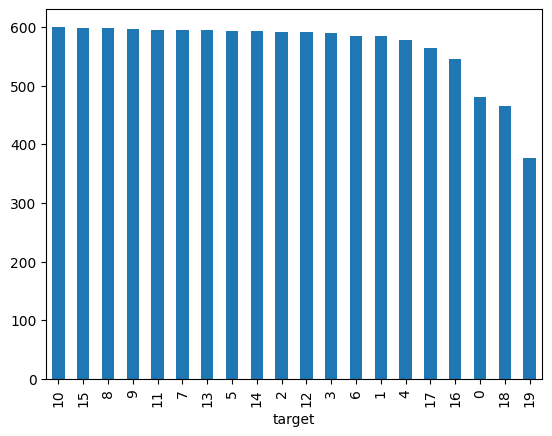

In [14]:
data['target'].value_counts().plot(kind='bar') #target의 분포 확인해주기

In [15]:
train_x = news_data.data
train_y = news_data.target

test_data = fetch_20newsgroups(subset='test',shuffle=True)
test_x = test_data.data
test_y = test_data.target


In [19]:
vocab_size = 10000
num_classes = 20

#데이터 전처리 실행
def preprocessing_data(train_data,test_data,mode):
    tokenizer = Tokenizer(num_words=vocab_size)# vocab_size 개수만큼의 단어만 사용한다.
    tokenizer.fit_on_texts(train_data)
    X_train = tokenizer.texts_to_matrix(train_data,mode=mode)#샘플 수 * vocab_size 만큼의 matrix생성
    X_test = tokenizer.texts_to_matrix(test_data,mode=mode)
    return X_train,X_test,tokenizer.index_word


In [20]:
X_train,X_test,wordindex = preprocessing_data(train_x,test_x,'binary')
y_train = to_categorical(train_y)
y_test = to_categorical(test_y)

print('훈련 샘플 본문의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 본문의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 본문의 크기 : (11314, 10000)
훈련 샘플 레이블의 크기 : (11314, 20)
테스트 샘플 본문의 크기 : (7532, 10000)
테스트 샘플 레이블의 크기 : (7532, 20)


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

def fit_and_eval(X_train,y_train,X_test,y_test):
    model = Sequential()
    model.add(Dense(256,input_shape=(vocab_size,),activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes,activation='softmax'))

    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    model.fit(X_train,y_train,batch_size=128,epochs=10,verbose=1,validation_split=0.1)
    score=model.evaluate(X_test,y_test,batch_size=128,verbose=0)
    return score

score = fit_and_eval(X_train,y_train,X_test,y_test)
print(score)

Epoch 1/10
80/80 [==============================] - 4s 40ms/step - loss: 2.2983 - accuracy: 0.3312 - val_loss: 0.9905 - val_accuracy: 0.8322
Epoch 2/10
80/80 [==============================] - 3s 38ms/step - loss: 0.8942 - accuracy: 0.7533 - val_loss: 0.4827 - val_accuracy: 0.8816
Epoch 3/10
80/80 [==============================] - 3s 38ms/step - loss: 0.4337 - accuracy: 0.8884 - val_loss: 0.3594 - val_accuracy: 0.8913
Epoch 4/10
80/80 [==============================] - 3s 37ms/step - loss: 0.2586 - accuracy: 0.9337 - val_loss: 0.3104 - val_accuracy: 0.9108
Epoch 5/10
80/80 [==============================] - 3s 38ms/step - loss: 0.1758 - accuracy: 0.9529 - val_loss: 0.2975 - val_accuracy: 0.9143
Epoch 6/10
80/80 [==============================] - 3s 38ms/step - loss: 0.1202 - accuracy: 0.9707 - val_loss: 0.2947 - val_accuracy: 0.9117
Epoch 7/10
80/80 [==============================] - 3s 40ms/step - loss: 0.0886 - accuracy: 0.9807 - val_loss: 0.2856 - val_accuracy: 0.9187
Epoch 8/10
80